In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from run import solvers, NXs

In [2]:
execfile('../../matplotlibrc.py')

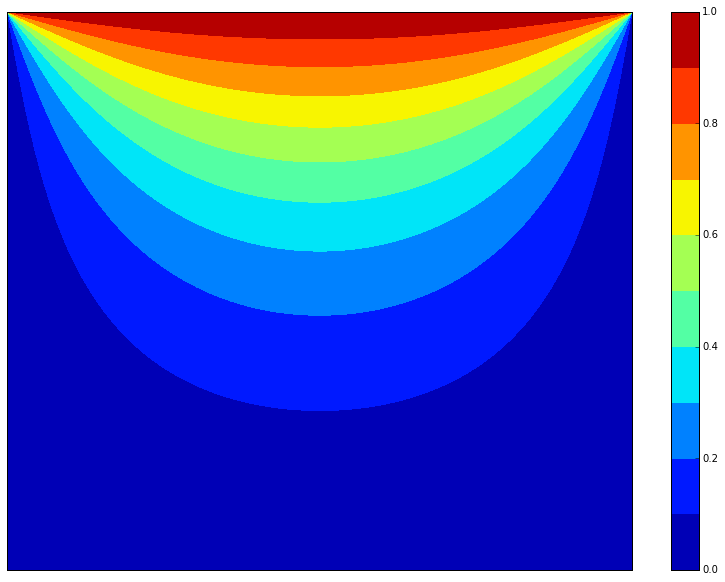

In [20]:
# Question 3
fig, ax = plt.subplots(figsize=(14, 10))
u = np.loadtxt('dat/Gauss_400_u.dat')
u = u.reshape((400, 400))
x = np.linspace(0, 1, 401)
levels = np.linspace(0, 1, 11)
ax.set_xticks([])
ax.set_yticks([])
CS = ax.contourf(u, levels=levels)
fig.colorbar(CS)
fig.savefig('tex/figs/q3.pdf', dpi=200)

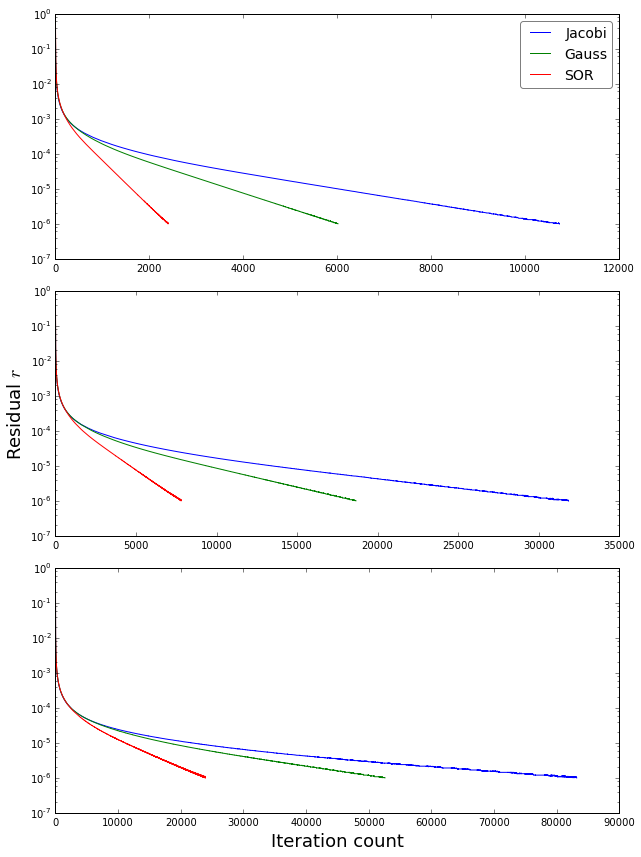

In [26]:
# Question 4
fig, axes = plt.subplots(nrows=3, figsize=(9, 12))
for nx, ax in zip(NXs, axes):
    for solver in solvers:
        prefix = '%s_%i' % (solver, nx)
        r = np.loadtxt('dat/%s_r.dat' % prefix)
        ax.semilogy(r, label=solver)
axes[0].legend()
axes[1].set_ylabel('Residual $r$')
axes[2].set_xlabel('Iteration count')
fig.tight_layout()
fig.savefig('tex/figs/q4.pdf', dpi=200)

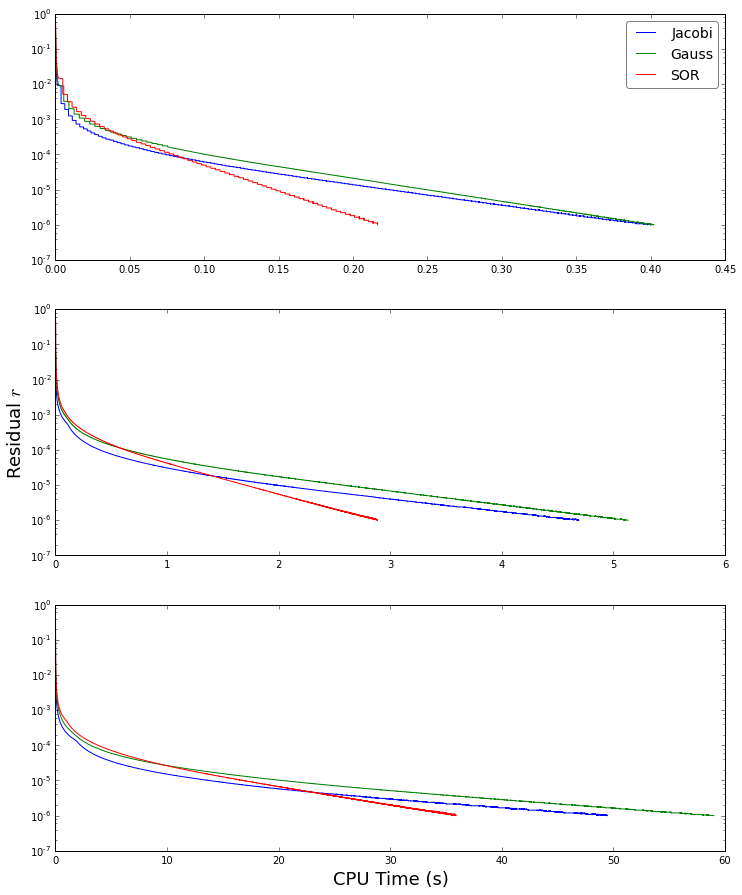

In [73]:
# Question 5
fig, axes = plt.subplots(nrows=3, figsize=(12, 15))
for nx, ax in zip(NXs, axes):
    for solver in solvers:
        prefix = '%s_%i' % (solver, nx)
        r = np.loadtxt('dat/%s_r.dat' % prefix)
        t = np.loadtxt('dat/%s_t.dat' % prefix)
        ax.semilogy(t, r, label=solver)
axes[0].legend()
axes[1].set_ylabel('Residual $r$')
axes[2].set_xlabel('CPU Time (s)')

In [3]:
# Question 5 table
import ast

In [71]:
time_data = ast.literal_eval(open('time_data.py').read())
tablehead = r'''\newcommand{\mct}[1]{\multicolumn{2}{c}{#1}}
\newcommand{\pht}{\phantom{a}}
\newcommand{\mrt}[1]{\multirow{4}{*}{#1}}
\begin{table}[H]
\caption{Performance comparison of Gauss and Jacobi using different
optimization levels. All runs converged with a tolerance of 
$10^{-6}$.}
\centering
\begin{tabular}{@{}r cc c cc c cc @{}}
    \toprule
    & \mct{Iterations} & \pht & \mct{Time per Iteration} & \pht & \mct{Total Time}\\
    &         &        & \pht & \mct{($10^{-5}$ s)}        & \pht & \mct{(s)}       \\   
    \cmidrule{2-3} \cmidrule{5-6} \cmidrule {8-9}
     & Jacobi & Gauss && Jacobi & Gauss && Jacobi & Gauss\\
    \midrule
'''
tablefoot = r'''
    \bottomrule
\end{tabular}
\end{table}'''
olevels = ['-g', '-O1', '-O2', '-O3']
row_names = ['g', 'O1', 'O2', 'O3']
row_names = ['%6s' % name for name in row_names]
formats = ['%5.2f', '%5.1f', '%5.f']
slvs = [1,2]
lines = []
for nx, fmt in zip([100, 200, 400], formats):
    lines.append('$N = %i$\\\\' % nx)
    iters = ['%i'%time_data[olevels[0]][slv][nx][0] for slv in slvs]
    iter_first = [r'\mrt{%s}'%i for i in iters]
    for olevel, name in zip(olevels, row_names):
        if olevel == '-g':
            iters = [r'\mrt{%i}'%time_data[olevel][slv][nx][0] for slv in slvs]
        else:
            iters = ['' for slv in slvs]
        time_per_iter = ['%.0f'%(time_data[olevel][slv][nx][1]/1e-5)
                         for slv in slvs]
        total_time = [fmt%time_data[olevel][slv][nx][2] for slv in slvs]
        vals = ' && '.join(
            [' & '.join(field) for field in [iters, time_per_iter, total_time]]
        )
        line = name + ' & ' + vals + ' \\\\'
        lines.append(line)
#### Extra Manual Data

body = '\n'.join(lines)
table = '\n'.join([tablehead, body, tablefoot])
# print(body)
open('tex/q4table.tex', 'w').write(table)

In [ ]:
# Question 6
# Must calculate exact solution

In [20]:
from run import run, modify_param

In [17]:
run()

' Converged after        27191  iterations.\n'

In [18]:
!ls

A.dat  dat	  r.dat   run.pyc  t.dat  u.dat
bin    input.prm  run.py  src	   tex	  Untitled.ipynb


In [19]:
# Question 7
def plot_data():
    r = np.loadtxt('r.dat')
    plt.plot(r)

In [23]:
!cat input.prm

100
3
1.5


0.25
 Converged after        23402  iterations.

0.5
 Converged after        12567  iterations.

0.75
 Converged after         7966  iterations.

1.0
 Converged after         5297  iterations.

1.25
 Converged after         3492  iterations.

1.5
 Converged after         2144  iterations.

1.75
 Converged after         1047  iterations.

1.95
 Converged after          245  iterations.



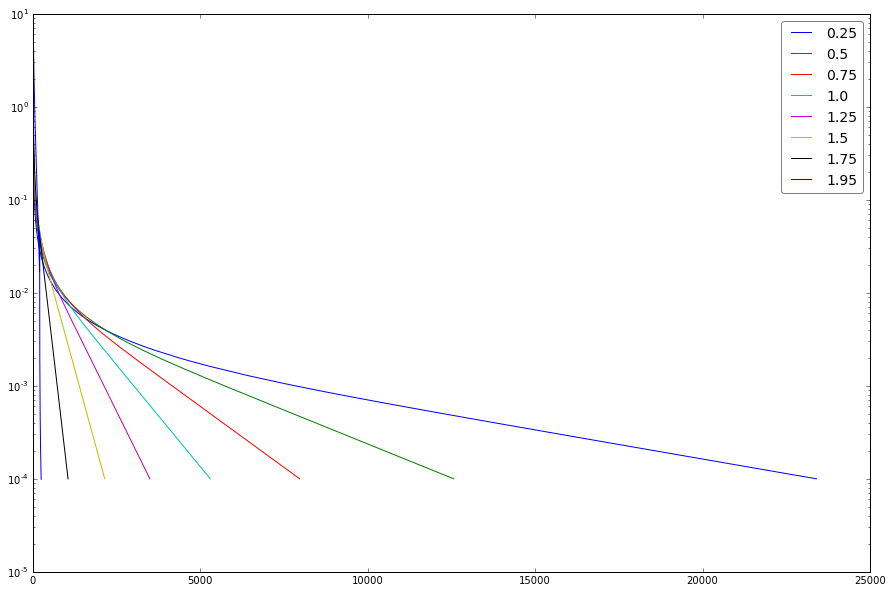

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))
# Can't go >= 2, otherwise residual oscillates at around 1-10. 
for relax in [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 1.95]:
    modify_param('relax', relax)
    print(relax)
    print(run())
    r = np.loadtxt('r.dat')
    ax.semilogy(r, label=str(relax))
ax.legend()
plt.show()